### PT Symmetric Bilayer Kagome Models 


In [5]:
using StaticArrays
using LinearAlgebra
using Makie
using CairoMakie
using Colors 


In [2]:
# Here, we define the three vectors connecting nearest neighbor Kagome atoms 

# Useful C_3 rotation
global const C_3::Matrix{Float64} = [cos(2.0*pi/3.0) -sin(2.0*pi/3.0); sin(2.0*pi/3.0) cos(2.0*pi/3.0)]

# Useful C_6 rotation
global const C_6::Matrix{Float64} = [cos(pi/3.0) -sin(pi/3.0); sin(pi/3.0) cos(pi/3.0)]



global const s1  = @SArray ComplexF64[0.0 1.0; 1.0 0.0]
global const s2  = @SArray ComplexF64[0.0 -im; im 0.0]
global const s3  = @SArray ComplexF64[1.0 0.0; 0.0 -1.0];
global const s0  = @SArray ComplexF64[1.0 0.0; 0.0 1.0];


global const s_up  = @SArray ComplexF64[1.0 0.0; 0.0 0.0];
global const s_dn  = @SArray ComplexF64[0.0 0.0; 0.0 1.0];


global const T1::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 1.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const T2::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 0.0 1.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const T3::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 0.0 0.0; 0.0 0.0 1.0; 0.0 0.0 0.0]

global const A1::Vector{Float64} = [1.0, 0.0]
global const A2::Vector{Float64} = [-0.5, sqrt(3)/2]

global const A::SMatrix{2, 2, Float64, 4} = @SMatrix [A1[1] A1[2]; A2[1] A2[2]]
global const G::SMatrix{2, 2, Float64, 4} = inv(A)'
global const G1::SVector{2, Float64} = G[1, :]
global const G2::SVector{2, Float64} = G[2, :]


2-element SVector{2, Float64} with indices SOneTo(2):
 -0.0
  1.1547005383792517

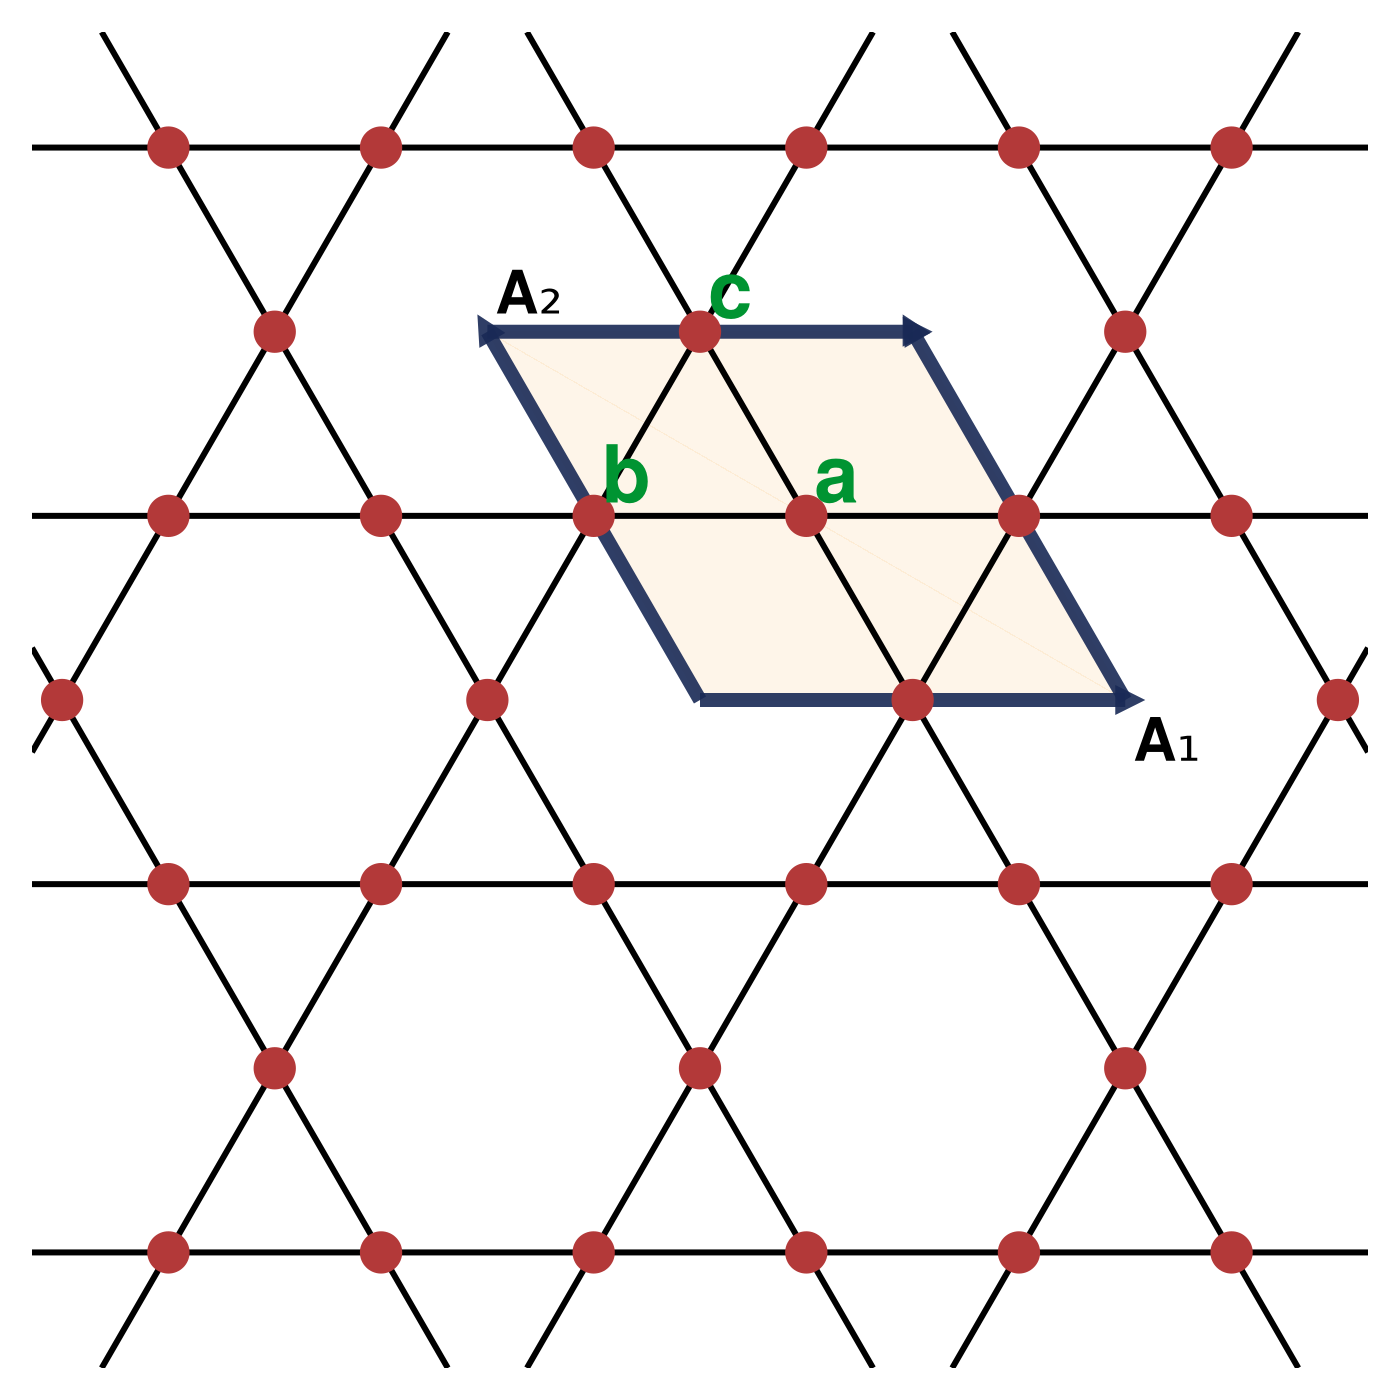

In [39]:
### Now, let us plot the Kagome Lattice  ! 
let 
    # First, compute the atom positions 
    a = 0.5 * (A1 + A2)
    b = 0.5 * A1 
    c = 0.5 * A2 

    box_ln::Float64 = π / 2

    Λ::Int = 4
    a_points = Vector{Vector{Float64}}(undef, (2 * Λ + 1)^2)
    b_points = Vector{Vector{Float64}}(undef, (2 * Λ + 1)^2)
    c_points = Vector{Vector{Float64}}(undef, (2 * Λ + 1)^2)
    counter::Int = 1
    for n ∈ -Λ:Λ
        for m ∈ -Λ:Λ
            a_points[counter] = a + n * A1 + m * A2
            counter += 1 
        end
    end
    counter = 1 
    for n ∈ -Λ:Λ
        for m ∈ -Λ:Λ
            b_points[counter] = b + n * A1 + m * A2
            counter += 1 
        end
    end
    counter = 1
    for n ∈ -Λ:Λ
        for m ∈ -Λ:Λ
            c_points[counter] = c + n * A1 + m * A2
            counter += 1 
        end
    end

    # Distance between the atoms 
    Distance::Float64 = norm(a - b)

    NNPairs_AB = Tuple{Vector{Float64}, Vector{Float64}}[]
    for a ∈ a_points
        for b ∈ b_points
            d = norm(a - b) 
            if (abs(d - Distance) < 1e-6)
                push!(NNPairs_AB, (a, b))
            end
        end
    end

    NNPairs_AC = Tuple{Vector{Float64}, Vector{Float64}}[]
    for a ∈ a_points
        for c ∈ c_points
            d = norm(a - c) 
            if (abs(d - Distance) < 1e-6)
                push!(NNPairs_AC, (a, c))
            end
        end
    end

    NNPairs_BC = Tuple{Vector{Float64}, Vector{Float64}}[]
    for b ∈ b_points
        for c ∈ c_points
            d = norm(b - c) 
            if (abs(d - Distance) < 1e-6)
                push!(NNPairs_BC, (b, c))
            end
        end
    end


    f = Figure(size = (700, 700), backgroundcolor = RGBf(1, 1, 1)) 
    ax = Axis(f[1, 1], aspect = 1, spinewidth = 4.5, limits = (-box_ln, box_ln, -box_ln, box_ln))

    # Parallelogram 
    vertices = Point2f[(0,0), (A1[1], A1[2]), (A2[1], A2[2]), (A1[1] + A2[1], A1[2] + A2[2])]

    ParallelogramColor = "#F79F1F" # Pico void color 
    ParallelogramColor = parse(Colorant, ParallelogramColor) 
    Alpha = 0.1
    ParallelogramColor = RGBA(ParallelogramColor.r, ParallelogramColor.g, ParallelogramColor.b, Alpha)
    
    mesh!(ax, vertices, [1 2 3; 2 4 3], color = ParallelogramColor)

    # Basis 
    BasisColor = "#192a56" # Pico void color 
    BasisColorIn = parse(Colorant, BasisColor) 
    Alpha = 0.9
    BasisColorIn = RGBA(BasisColorIn.r, BasisColorIn.g, BasisColorIn.b, Alpha)
    Start_xs = [0.0, 0.0, A2[1], A1[1]]
    Start_ys = [0.0, 0.0, A2[2], A1[2]]
    Arrows_xs = [A1[1], A2[1], A1[1], A2[1]]
    Arrows_ys = [A1[2], A2[2], A1[2], A2[2]]
    arrows!(ax, Start_xs, Start_ys, Arrows_xs, Arrows_ys, linewidth = 7, 
            color = BasisColorIn, arrowsize = 20.6)

    
    # Lattice Edges 
    for (a, b) ∈ NNPairs_AB
        lines!(ax, [a[1], b[1]], [a[2], b[2]], color = :black, linewidth = 3)
    end
    for (a, c) ∈ NNPairs_AC
        lines!(ax, [a[1], c[1]], [a[2], c[2]], color = :black, linewidth = 3)
    end
    for (b, c) ∈ NNPairs_BC
        lines!(ax, [b[1], c[1]], [b[2], c[2]], color = :black, linewidth = 3)
    end
    # Plot the A, B, and C sites 
    AtomSize = 30
    AtomColor = "#b33939"
    for a ∈ a_points
        scatter!(ax, a[1], a[2], markersize = AtomSize, color = AtomColor)
    end
    for b ∈ b_points
        scatter!(ax, b[1], b[2], markersize = AtomSize, color = AtomColor)
    end
    for c ∈ c_points
        scatter!(ax, c[1], c[2], markersize = AtomSize, color = AtomColor)
    end
    
    text!(
        ax, A1[1], A1[2],
        text = "A₁",
        font = :bold,
        align = (:left, :top),
        offset = (4, -2),
        #space = :relative,
        fontsize = 30
    )
    text!(
        ax, A2[1], A2[2],
        text = "A₂",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, 2),
        #space = :relative,
        fontsize = 30
    )

    # A, B, C Sites 
    text!(
        ax, a[1], a[2],
        text = "a",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, -2),
        #space = :relative,
        fontsize = 40,
        color = "#009432"
    )

    text!(
        ax, b[1] + A2[1], b[2] + A2[2],
        text = "c",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, -2),
        #space = :relative,
        fontsize = 40,
        color = "#009432"
    )

    text!(
        ax, c[1], c[2],
        text = "b",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, -2),
        #space = :relative,
        fontsize = 40,
        color = "#009432"
    )



    hidexdecorations!(ax)
    hideydecorations!(ax)
    hidespines!(ax)
    f
end